# Story - 7 : Where Do Strategic Minerals Come From?

### Brandon Chung
### 12/07/2025

Introduction

In this analysis I will be assessing where critical minerals, as listed in the US Geological Survey 2022 list of Strategic Minerals, come from and the relience of these minerals under stressed circumstances such as war or economic crisis.

In [140]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mticker
from collections import Counter



## Data Preprocessing

### Strategic Minerals data 

In [114]:
# Strategic Minerals data located at USGS website via exported CSV file 
# https://www.sciencebase.gov/catalog/item/677eaf95d34e760b392c4970

# Load data
materials_economy = pd.read_csv('MCS2025_Fig1_Minerals_in_Economy.csv')
materials_import_reliance = pd.read_csv('MCS2025_Fig2_Net_Import_Reliance.csv') # only minerals with >20% import reliance listed
materials_import_sources = pd.read_csv('MCS2025_Fig3_Major_Import_Sources.csv')
materials_end_use = pd.read_csv('MCS2025_T4_Critical_Minerals_End_Use.csv')

### Material impact on economy

In [115]:
# keeping only Nonfuel minerals column and value_billions_dollars columns

materials_economy = materials_economy[['Nonfuel_Mineral_Economic_Inputs', 'Value_billion_dollars']]

# renaming columns for easier access
materials_economy.columns = ['Economic_Inputs', 'Dollars (billions)']
materials_economy.head()

,Economic_Inputs,Dollars (billions)
0,Mineral Raw Materials: Net Exports,4.8
1,Mineral Raw Materials: Exports,10.6
2,Mineral Raw Materials: Imports,5.8
3,Domestically Mined Mineral Raw Materials,106.0
4,Domestically Recycled Metals and Mineral Produ...,48.0


### Material import reliance

In [116]:
# List of strategic minerals
strategic_minerals = [
  "Aluminum", "Antimony", "Arsenic", "Barite", "Beryllium", "Bismuth", "Cerium", "Cesium", 
  "Chromium", "Cobalt", "Dysprosium", "Erbium", "Europium", "Fluorspar", "Gadolinium", 
  "Gallium", "Germanium", "Graphite", "Hafnium", "Holmium", "Indium", "Iridium", "Lanthanum", 
  "Lithium", "Lutetium", "Magnesium", "Manganese", "Neodymium", "Nickel", "Niobium", 
  "Palladium", "Platinum", "Praseodymium", "Rhodium", "Rubidium", "Ruthenium", "Samarium", 
  "Scandium", "Tantalum", "Tellurium", "Terbium", "Thulium", "Tin", "Titanium", "Tungsten", 
  "Vanadium", "Ytterbium", "Yttrium", "Zinc", "Zirconium"
]

# keeping only relevant columns and filtering for selected minerals
materials_import_reliance = materials_import_reliance[['Commodity', 'Net_Import_Reliance_pct_2024','Major_Import_Sources_2020_2023' ]]

# Cleaning 'Commodity' column to match strategic minerals list
materials_import_reliance["Mineral"] = (
    materials_import_reliance["Commodity"]
    .str.upper()                # normalize case
    .str.replace(r",.*", "", regex=True)  # remove everything after a comma
    .str.replace(r"\s+metal", "", regex=True)  # remove "metal"
    .str.strip()                # remove leading/trailing spaces
)

# Making Mineral column only have capitalized first letters
materials_import_reliance["Mineral"] = materials_import_reliance["Mineral"].str.title()

# Filtering for only strategic minerals
materials_import_reliance = materials_import_reliance[materials_import_reliance["Mineral"].isin(strategic_minerals)]

# Removing commodity column as it's no longer needed
materials_import_reliance = materials_import_reliance.drop(columns=['Commodity'])

# Reordering columns
materials_import_reliance = materials_import_reliance[['Mineral', 'Net_Import_Reliance_pct_2024', 'Major_Import_Sources_2020_2023']]

# Renaming columns for easier access
materials_import_reliance.columns = ['Mineral', 'Import_Reliance_%', 'Major_Import_Sources_2020_2023']

# removing white spaces from materials_import_reliance
materials_import_reliance = materials_import_reliance.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\chung\AppData\Local\Temp\ipykernel_26952\3544712327.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  materials_import_reliance = materials_import_reliance.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [117]:
# cleaning import reliance percentage column to remove < and > signs
materials_import_reliance['Import_Reliance_%'] = materials_import_reliance['Import_Reliance_%'].str.replace('<', '').str.replace('>', '').astype(float)


In [118]:
materials_import_reliance.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Mineral                         28 non-null     object 
 1   Import_Reliance_%               28 non-null     float64
 2   Major_Import_Sources_2020_2023  28 non-null     object 
dtypes: float64(1), object(2)
memory usage: 896.0+ bytes


### Material Import Sources

In [119]:
# Removing unnecessary columns
materials_import_sources = materials_import_sources[['Country', 'Commodity_Count']]

materials_import_sources.head()

,Country,Commodity_Count
0,Australia,6
1,Austria,2
2,Belarus,1
3,Belgium,8
4,Bolivia,3


### Materials End Use

In [120]:
# Removing unnecessary columns
materials_end_use = materials_end_use[['Critical Mineral', 'Primary Applications']]

# filtering for only strategic minerals
materials_end_use = materials_end_use[materials_end_use["Critical Mineral"].isin(strategic_minerals)]

materials_end_use.head()

,Critical Mineral,Primary Applications
0,Aluminum,Metallurgy and many sectors of the economy.
1,Antimony,Flame retardants and lead-acid batteries.
2,Arsenic,Pesticides and semiconductors.
3,Barite,Hydrocarbon production.
4,Beryllium,Aerospace and defense.


In [121]:
materials_end_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Critical Mineral      49 non-null     object
 1   Primary Applications  49 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### USA Allies (NATO and Major Non-Nato Ally Status)

NATO ally list found here https://www.nato.int/en/about-us/organization/nato-member-countries
Major Non-Nato Ally Status list found here https://www.state.gov/major-non-nato-ally-status/

In [122]:
# Creating list of NATO countries for later use
nato_countries = [ "Albania", "Belgium", "Bulgaria", "Canada", "Croatia", "Czech Republic",
  "Denmark", "Estonia", "France", "Germany", "Greece", "Hungary", "Iceland", "Italy",
  "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands", "North Macedonia",
  "Norway", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Turkey",
  "United Kingdom"]

# Creating list of Major non-NATO allies for later use Argentina, Australia, Bahrain, Brazil, Colombia, Egypt, Israel, Japan, Jordan, Kenya, Kuwait, Morocco, New Zealand, Pakistan, the Philippines, Qatar, South Korea, Thailand, and Tunisia.
major_non_nato_allies = ["Argentina", "Australia", "Bahrain", "Brazil", "Colombia", "Egypt", "Israel", "Japan", "Jordan", "Kenya", "Kuwait", "Morocco", "New Zealand", "Pakistan", "Philippines", "Qatar", "South Korea", "Thailand", "Tunisia"]

# Combining both lists for easier filtering
allied_countries = nato_countries + major_non_nato_allies

allied_countries

['Albania',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Turkey',
 'United Kingdom',
 'Argentina',
 'Australia',
 'Bahrain',
 'Brazil',
 'Colombia',
 'Egypt',
 'Israel',
 'Japan',
 'Jordan',
 'Kenya',
 'Kuwait',
 'Morocco',
 'New Zealand',
 'Pakistan',
 'Philippines',
 'Qatar',
 'South Korea',
 'Thailand',
 'Tunisia']

## Data Visualizations

C:\Users\chung\AppData\Local\Temp\ipykernel_26952\2769086773.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



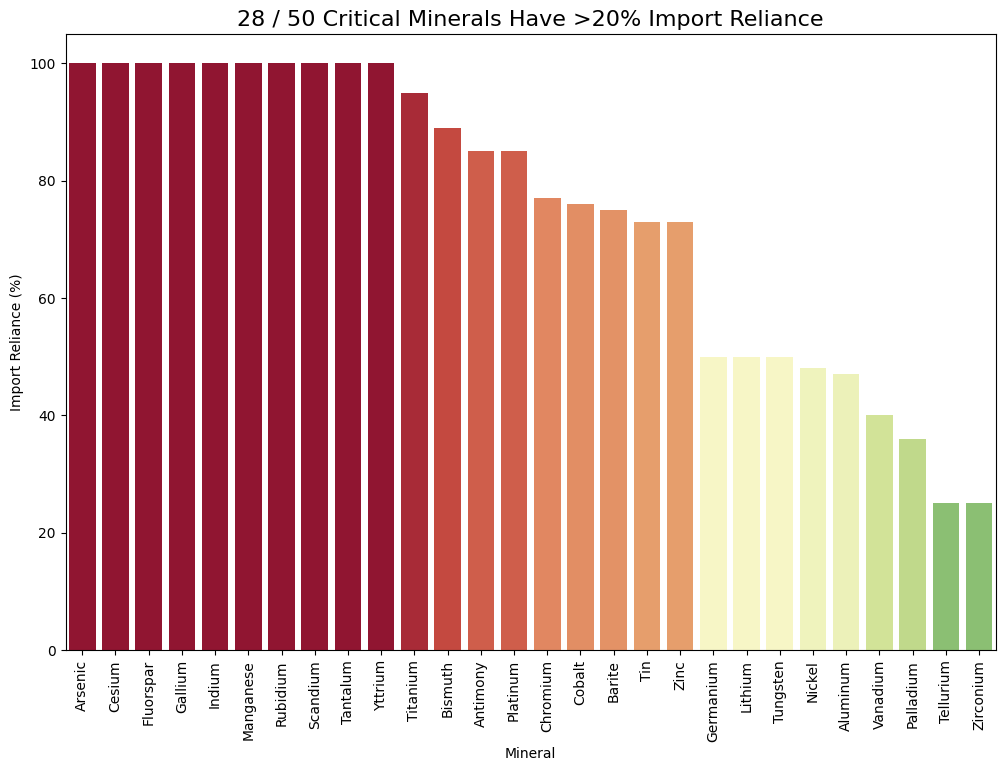

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalize values between 0 and 100
norm = mcolors.Normalize(vmin=0, vmax=100)

cmap = plt.cm.get_cmap("RdYlGn_r")  


colors = [cmap(norm(v)) for v in materials_import_reliance["Import_Reliance_%"]]

color_map = dict(zip(materials_import_reliance["Mineral"], colors))

plt.figure(figsize=(12,8))
sns.barplot(
    data=materials_import_reliance,
    x="Mineral",
    y="Import_Reliance_%",
    hue="Mineral",          
    palette=color_map,
    legend=False
)
plt.xticks(rotation=90)
plt.title("28 / 50 Critical Minerals Have >20% Import Reliance", fontsize=16)
plt.ylabel("Import Reliance (%)")
plt.show()

In [134]:
materials_end_use.head()

,Critical Mineral,Primary Applications
0,Aluminum,Metallurgy and many sectors of the economy.
1,Antimony,Flame retardants and lead-acid batteries.
2,Arsenic,Pesticides and semiconductors.
3,Barite,Hydrocarbon production.
4,Beryllium,Aerospace and defense.


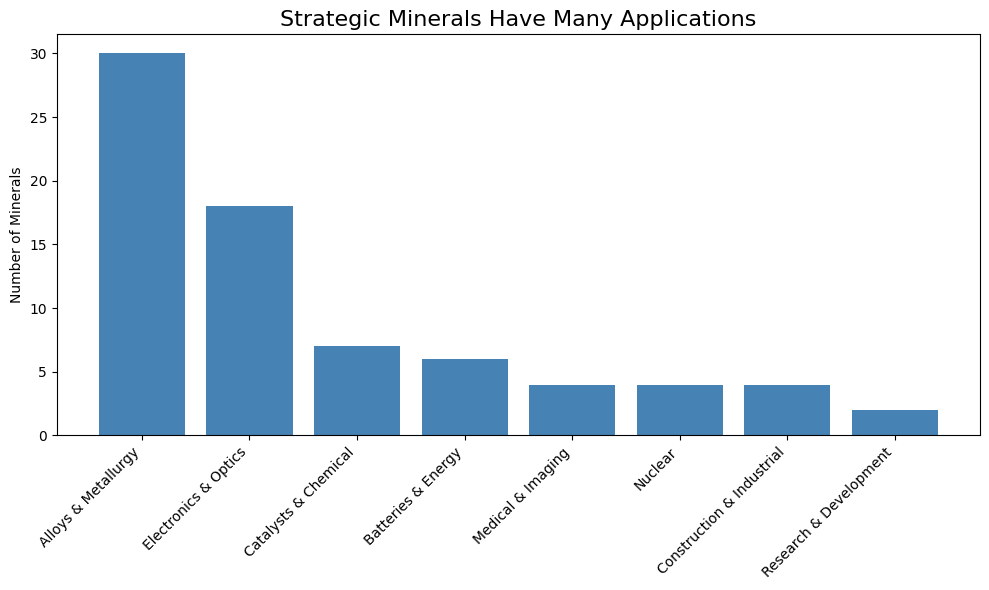

In [ ]:
# Define categories and minerals
categories = {
    "Alloys & Metallurgy": [
        "Aluminum","Beryllium","Chromium","Cobalt","Dysprosium","Erbium","Fluorspar","Gadolinium",
        "Hafnium","Holmium","Lanthanum","Magnesium","Manganese","Neodymium","Nickel","Niobium",
        "Praseodymium","Samarium","Scandium","Tantalum","Terbium","Thulium","Tin","Titanium",
        "Tungsten","Vanadium","Ytterbium","Yttrium","Zinc","Zirconium"
    ],
    "Batteries & Energy": ["Antimony","Cobalt","Graphite","Lithium","Manganese","Nickel"],
    "Electronics & Optics": [
        "Arsenic","Cerium","Dysprosium","Erbium","Europium","Gallium","Germanium","Indium",
        "Lanthanum","Lutetium","Neodymium","Praseodymium","Rubidium","Ruthenium","Terbium",
        "Thulium","Ytterbium","Yttrium"
    ],
    "Catalysts & Chemical": ["Cerium","Iridium","Lanthanum","Palladium","Platinum","Rhodium","Ruthenium"],
    "Medical & Imaging": ["Bismuth","Gadolinium","Lutetium","Samarium"],
    "Nuclear": ["Europium","Hafnium","Holmium","Samarium"],
    "Research & Development": ["Cesium","Rubidium"],
    "Construction & Industrial": ["Barite","Fluorspar","Titanium","Zinc"]
}

counts = {cat: len(mins) for cat, mins in categories.items()}


sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))


plt.figure(figsize=(10,6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color="steelblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Minerals")
plt.title("Strategic Minerals Have Many Applications", fontsize=16)
plt.tight_layout()
plt.show()





In [163]:
# Subsetting materials_import_reliance to include only minerals with 100% import reliance
materials_import_reliance_100 = materials_import_reliance[materials_import_reliance['Import_Reliance_%'] == 100.0]  

materials_import_reliance_100


,Mineral,Import_Reliance_%,Major_Import_Sources_2020_2023
0,Arsenic,100.0,"China, Morocco, Malaysia, Belgium"
2,Cesium,100.0,"Germany, China"
3,Fluorspar,100.0,"Mexico, Vietnam, South Africa, China"
4,Gallium,100.0,"Japan, China, Germany, Canada"
6,Indium,100.0,"Republic of Korea, Japan, Canada, Belgium"
7,Manganese,100.0,"Gabon, South Africa, Australia, Malaysia"
10,Rubidium,100.0,"China, Germany, Russia"
11,Scandium,100.0,"Japan, China, Philippines"
13,Tantalum,100.0,"China, Australia, Germany, Indonesia"
14,Yttrium,100.0,"China, Germany"


In [ ]:
import plotly.graph_objects as go

sources_dict = {
    "Arsenic": ["China","Morocco","Malaysia","Belgium"],
    "Cesium": ["Germany","China"],
    "Fluorspar": ["Mexico","Vietnam","South Africa","China"],
    "Gallium": ["Japan","China","Germany","Canada"],
    "Indium": ["Republic of Korea","Japan","Canada","Belgium"],
    "Manganese": ["Gabon","South Africa","Australia","Malaysia"],
    "Rubidium": ["China","Germany","Russia"],
    "Scandium": ["Japan","China","Philippines"],
    "Tantalum": ["China","Australia","Germany","Indonesia"],
    "Yttrium": ["China","Germany"]
}

# Build node labels (minerals + countries)
minerals = list(sources_dict.keys())
countries = sorted(set([c for sources in sources_dict.values() for c in sources]))
labels = minerals + countries

# Build links
sources = []
targets = []
values = []

for mineral, countries_list in sources_dict.items():
    for country in countries_list:
        sources.append(labels.index(mineral))   
        targets.append(labels.index(country))   
        values.append(1)                      

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Critical Minerals (100% Import Reliance) → Major Import Sources (2020-2023)", font_size=12)
fig.show()


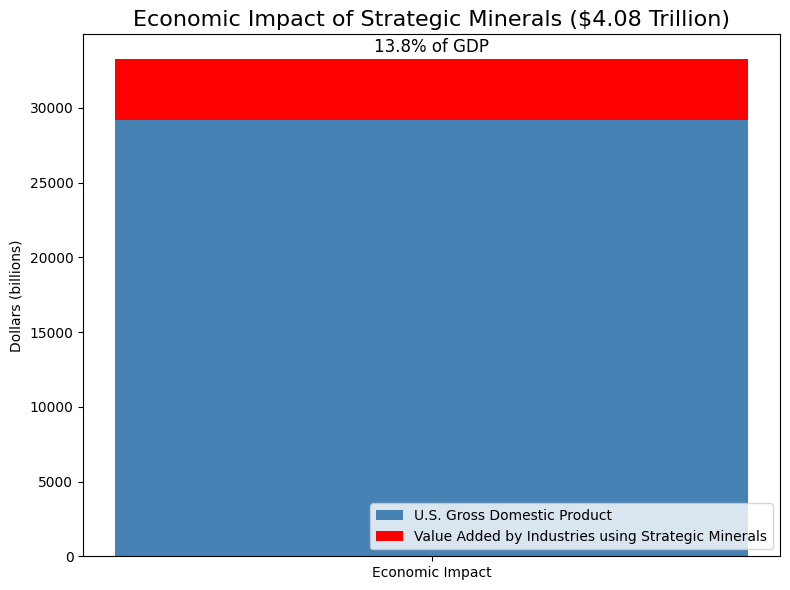

In [ ]:
# filtering economic impact data column "Economic Inputs" for only "U.S. Economy Gross Domestic Product", "Value Added to Gross Domestic Product by Major Industries That Consume Processed Mineral Materials", "Processed Mineral Materials: Imports", and "Mineral Raw Materials: Imports" 
materials_economy = materials_economy[materials_economy['Economic_Inputs'].isin([
    'U.S. Economy Gross Domestic Product',
    'Value Added to Gross Domestic Product by Major Industries That Consume Processed Mineral Materials',
])] 

gdp = 29179.0
value_added = 4080.0

# Labels
labels = ["Economic Impact"]

# Plot stacked bar
plt.figure(figsize=(8,6))
plt.bar(labels, gdp, label="U.S. Gross Domestic Product", color="steelblue")
plt.bar(labels, value_added, bottom=gdp, label="Value Added by Industries using Strategic Minerals", color="red")

plt.ylabel("Dollars (billions)")
plt.title("Economic Impact of Strategic Minerals ($4.08 Trillion)", fontsize=16)

plt.legend(loc="lower right")

percent_text = "13.8% of GDP"
plt.text(0, gdp + value_added + 500, percent_text, ha="center", fontsize=12, color="black")

plt.tight_layout()
plt.show()



In [128]:
materials_economy.head()

,Economic_Inputs,Dollars (billions)
12,Value Added to Gross Domestic Product by Major...,4080.0
13,U.S. Economy Gross Domestic Product,29179.0


C:\Users\chung\AppData\Local\Temp\ipykernel_26952\346049644.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




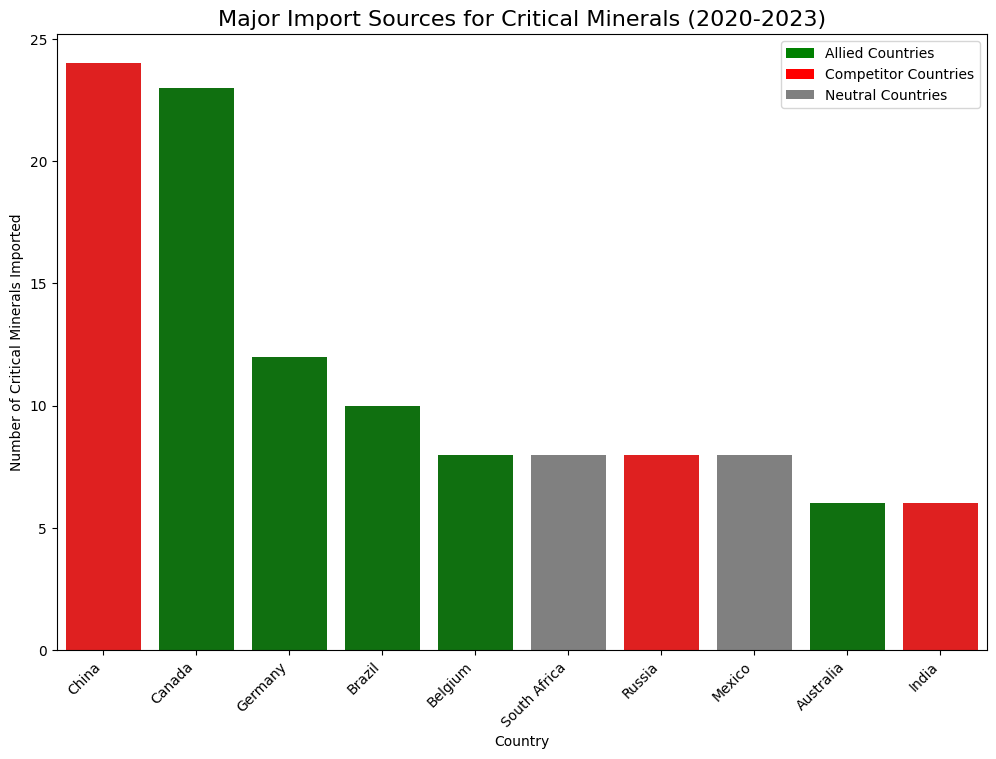

In [170]:
# Visualizing top 10 major import sources by country

competitor_countries = ["China", "Russia", "India"]

# Sort data by Commodity_Count descending
sorted_data = materials_import_sources.sort_values(
    by="Commodity_Count", ascending=False
).head(10)

# Create a color list: highlight allied countries
colors = [
"green" if country in allied_countries else "red" if country in competitor_countries else "gray"
    for country in sorted_data["Country"]
]

plt.figure(figsize=(12,8))
sns.barplot(
    data=sorted_data,
    x="Country",
    y="Commodity_Count",
    palette=colors
)
plt.title("Major Import Sources for Critical Minerals (2020-2023)", fontsize=16)
plt.ylabel("Number of Critical Minerals Imported")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

# Add legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="green", label="Allied Countries"),
    Patch(facecolor="red", label="Competitor Countries"),
    Patch(facecolor="gray", label="Neutral Countries")
]
plt.legend(handles=legend_elements, loc="upper right")

plt.show()


In [177]:
materials_import_reliance

,Mineral,Import_Reliance_%,Major_Import_Sources_2020_2023,Sources_List
0,Arsenic,100.0,"China, Morocco, Malaysia, Belgium","[China, Morocco, Malaysia, Belgium]"
2,Cesium,100.0,"Germany, China","[Germany, China]"
3,Fluorspar,100.0,"Mexico, Vietnam, South Africa, China","[Mexico, Vietnam, South Africa, China]"
4,Gallium,100.0,"Japan, China, Germany, Canada","[Japan, China, Germany, Canada]"
6,Indium,100.0,"Republic of Korea, Japan, Canada, Belgium","[Republic of Korea, Japan, Canada, Belgium]"
7,Manganese,100.0,"Gabon, South Africa, Australia, Malaysia","[Gabon, South Africa, Australia, Malaysia]"
10,Rubidium,100.0,"China, Germany, Russia","[China, Germany, Russia]"
11,Scandium,100.0,"Japan, China, Philippines","[Japan, China, Philippines]"
13,Tantalum,100.0,"China, Australia, Germany, Indonesia","[China, Australia, Germany, Indonesia]"
14,Yttrium,100.0,"China, Germany","[China, Germany]"


In [ ]:
countries = df_competitors["Sources_List"].unique().tolist()
minerals = df_competitors["Mineral"].unique().tolist()
cats = list(categories.keys())
nodes = countries + minerals + cats
node_indices = {name: i for i, name in enumerate(nodes)}


links_country_mineral = [
    dict(source=node_indices[row["Sources_List"]],
         target=node_indices[row["Mineral"]],
         value=1)
    for _, row in df_competitors.iterrows()
]

links_mineral_category = []
for mineral in minerals:
    for cat, mins in categories.items():
        if mineral in mins:
            links_mineral_category.append(
                dict(source=node_indices[mineral],
                     target=node_indices[cat],
                     value=1)
            )
links = links_country_mineral + links_mineral_category


reliance_map = {
    row["Mineral"]: float(row["Import_Reliance_%"])
    for _, row in materials_import_reliance.iterrows()
}


colors = []
for node in nodes:
    if node in countries:
        colors.append("gray")
    elif node in minerals:
        reliance = reliance_map.get(node, 0)
        colors.append("red" if reliance >= 80 else "lightblue")
    else:  
        # Find minerals linked to this category
        linked_minerals = [m for m in minerals if node in categories and m in categories[node]]
        if linked_minerals:
            high_reliance_count = sum(1 for m in linked_minerals if reliance_map.get(m,0) >= 80)
            if high_reliance_count > len(linked_minerals)/2:
                colors.append("red")   # highlight category
            else:
                colors.append("green")
        else:
            colors.append("green")


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=colors
    ),
    link=dict(
        source=[l["source"] for l in links],
        target=[l["target"] for l in links],
        value=[l["value"] for l in links]
    )
)])

fig.update_layout(title_text="Competitor Countries → Minerals → Applications", font_size=12)
fig.show()

